Importing Necessary Packages

In [39]:
import pandas as pd
import keras
import tensorflow
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD

Load the training and testing data

In [40]:
train = pd.read_csv("../LP-IV-datasets/MNIST/mnist_train.csv")
test = pd.read_csv("../LP-IV-datasets/MNIST/mnist_test.csv")

Preparing data

In [41]:
x_train = train.drop("label", axis=1)
x_test = test.drop("label", axis=1)

In [42]:
y_train = train["label"]
y_test = test["label"]

In [43]:
# convert grayscale image pixels into black and white only (binary)
x_train = x_train / 255.0
x_test = x_test / 255.0

In [44]:
# convert y into binary representation using categorical
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [45]:
train_shape_y = x_train.shape[1]

Define the network architecture using Keras

In [46]:
model = Sequential([
    Dense(128, input_shape=(train_shape_y,), activation="relu"),
    Dense(64, activation="relu"),
    Dropout(0.2),
    Dense(10, activation="softmax")
])

rain the model using SGD with 11 epochs

In [47]:
model.compile(loss="categorical_crossentropy", optimizer=SGD(learning_rate=0.1, momentum=0), metrics=["accuracy"])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [48]:
M = model.fit(x=x_train, y=y_train, batch_size=512, epochs=11)

Epoch 1/11


2023-11-15 14:57:01.860819: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 376320000 exceeds 10% of free system memory.


118/118 [==============================] - 1s 6ms/step - loss: 0.9154 - accuracy: 0.7310
Epoch 2/11
118/118 [==============================] - 1s 5ms/step - loss: 0.4241 - accuracy: 0.8776
Epoch 3/11
118/118 [==============================] - 1s 6ms/step - loss: 0.3470 - accuracy: 0.9000
Epoch 4/11
118/118 [==============================] - 1s 5ms/step - loss: 0.3030 - accuracy: 0.9116
Epoch 5/11
118/118 [==============================] - 1s 5ms/step - loss: 0.2710 - accuracy: 0.9217
Epoch 6/11
118/118 [==============================] - 1s 5ms/step - loss: 0.2490 - accuracy: 0.9275
Epoch 7/11
118/118 [==============================] - 1s 5ms/step - loss: 0.2312 - accuracy: 0.9336
Epoch 8/11
118/118 [==============================] - 1s 5ms/step - loss: 0.2138 - accuracy: 0.9383
Epoch 9/11
118/118 [==============================] - 1s 6ms/step - loss: 0.1990 - accuracy: 0.9423
Epoch 10/11
118/118 [==============================] - 1s 6ms/step - loss: 0.1887 - accuracy: 0.9455
Epoch 11/1

Evaluate the network

In [49]:
acc, loss = model.evaluate(x=x_test, y=y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1508 - accuracy: 0.9552


Plot the training loss and accuracy

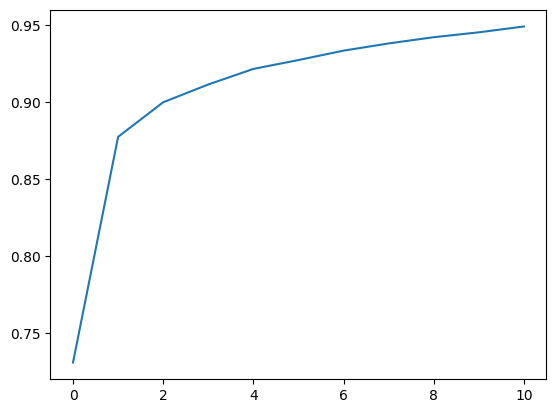

In [50]:
plt.plot(M.history['accuracy'])

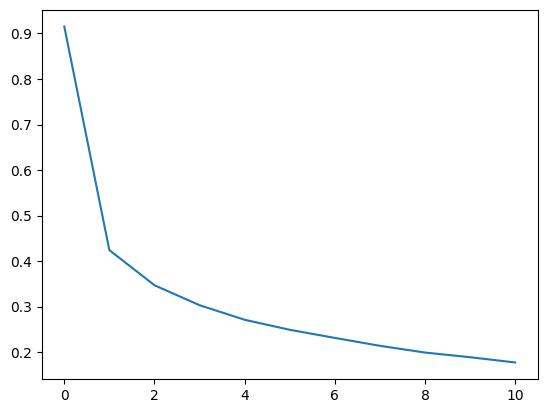

In [51]:
plt.plot(M.history['loss'])